# fashion_mnist

In [11]:
!python --version

Python 3.9.6


In [12]:
import tensorflow as tf

In [13]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

print(train_image.shape)
print(test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


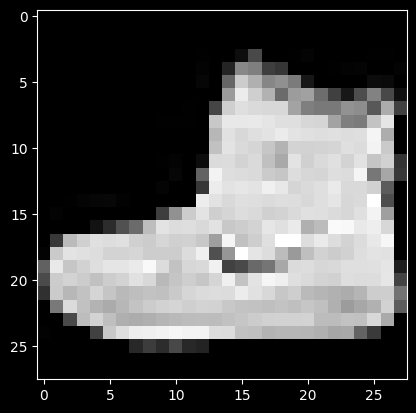

In [14]:
import matplotlib.pyplot as plt

plt.imshow(train_image[0], cmap='gray')
plt.show()

In [15]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(train_image)

norm_train_image = norm(train_image)
norm_test_image = norm(test_image)

print(norm_train_image.shape)
print(norm_test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [18]:
history = model.fit(norm_train_image,train_label,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.7757 - loss: 0.8321 - val_accuracy: 0.8535 - val_loss: 0.5425
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8574 - loss: 0.5142 - val_accuracy: 0.8677 - val_loss: 0.4708
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.8588 - loss: 0.4824 - val_accuracy: 0.8631 - val_loss: 0.4775
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.8656 - loss: 0.4622 - val_accuracy: 0.8652 - val_loss: 0.4705
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.8649 - loss: 0.4601 - val_accuracy: 0.8566 - val_loss: 0.4716
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8654 - loss: 0.4583 - val_accuracy: 0.8678 - val_loss: 0.4512
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.8651 - loss: 0.4554 - val_accuracy: 0.8577 - val_loss: 0.4791
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8701 -

In [19]:
test_loss, test_acc = model.evaluate(norm_test_image,  test_label, verbose=2)
print(f'\n最终测试集准确率: {test_acc*100:.2f}%')

313/313 - 0s - 438us/step - accuracy: 0.8658 - loss: 0.4734

最终测试集准确率: 86.58%


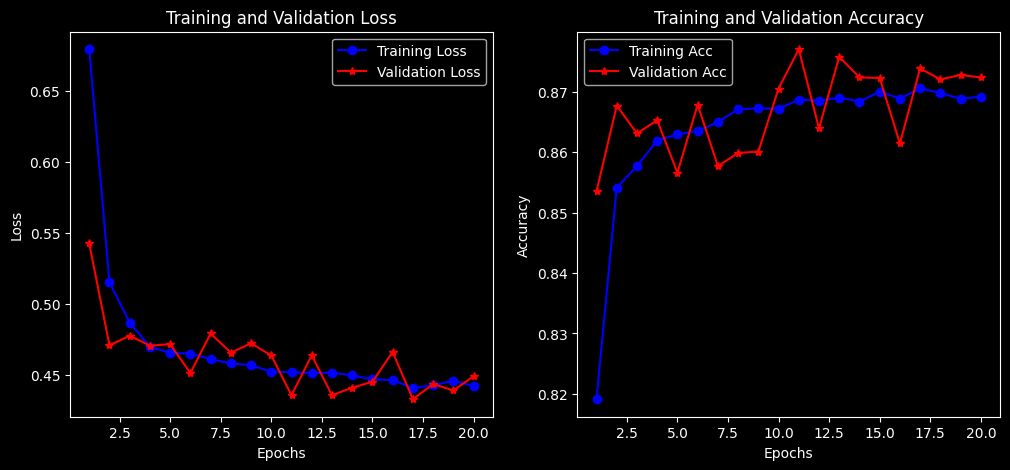

In [20]:
from common import plot_learning_curves

plot_learning_curves(history)

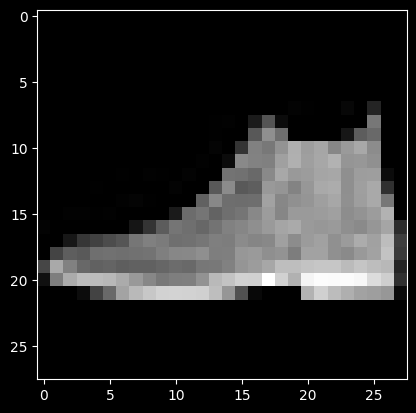

In [21]:
# predict
plt.imshow(test_image[0], cmap='gray')

In [36]:
import numpy as np

predictions = model.predict(norm_test_image)
print(np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
9
